<a href="https://colab.research.google.com/github/SilvioLopezQuintana/DSW-SilvioLopez/blob/main/Entregable_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
datos=pd.read_csv("/content/framingham.csv")
datos.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


###1. Análisis exploratorio de datos

In [44]:
datos.info()
datos.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


(4238, 16)

In [45]:
datos.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


###1.2 Cuantificación de registros nulos

In [46]:
datos.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

###1.3 Borrado de registros no relevantes al modelo

In [47]:
datos.drop(['education'],axis=1,inplace=True)

In [48]:
datos.dropna(subset=['heartRate'],inplace=True)

In [49]:
datos.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

###1.4 Visualización de las columnas con datos faltantes

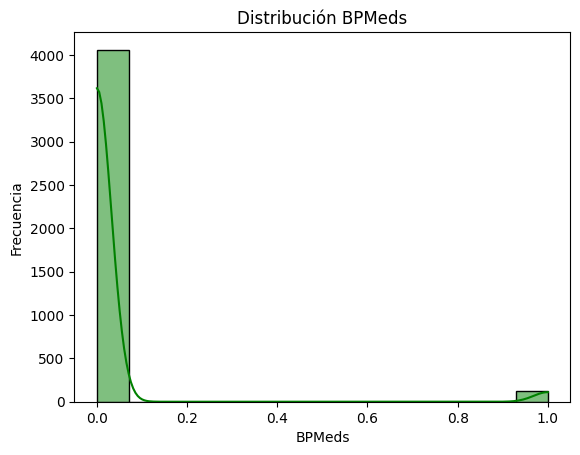

In [50]:
datos_BPMeds=datos.BPMeds
sns.histplot(datos_BPMeds,kde=True,color='green')
plt.xlabel('BPMeds')
plt.ylabel('Frecuencia')
plt.title('Distribución BPMeds')
plt.show()

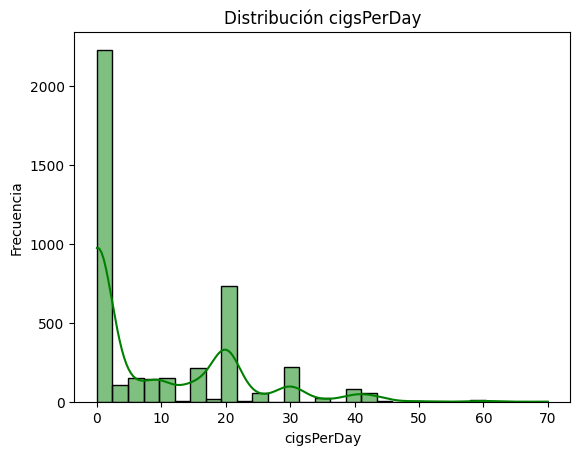

In [51]:
datos_cigarrillos=datos.cigsPerDay
sns.histplot(datos_cigarrillos,kde=True,color='green')
plt.xlabel('cigsPerDay')
plt.ylabel('Frecuencia')
plt.title('Distribución cigsPerDay')
plt.show()

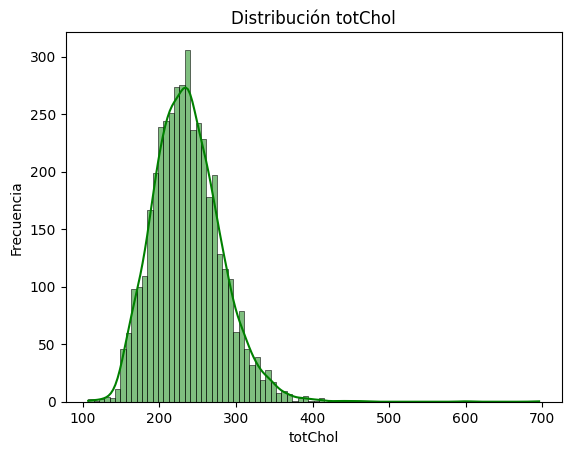

In [52]:
datos_totChol=datos.totChol
sns.histplot(datos_totChol,kde=True,color='green')
plt.xlabel('totChol')
plt.ylabel('Frecuencia')
plt.title('Distribución totChol')
plt.show()

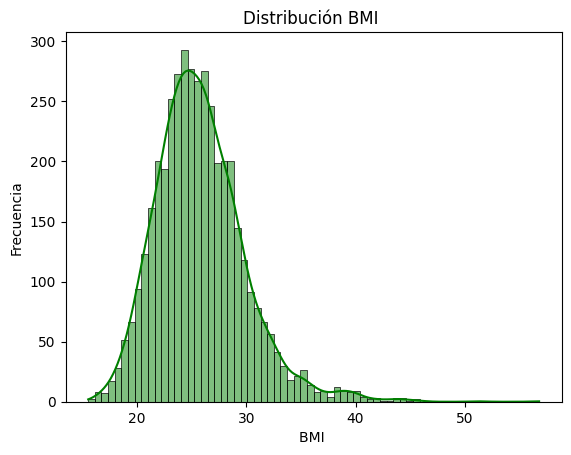

In [53]:
datos_BMI =datos.BMI
sns.histplot(datos_BMI ,kde=True,color='green')
plt.xlabel('BMI ')
plt.ylabel('Frecuencia')
plt.title('Distribución BMI ')
plt.show()

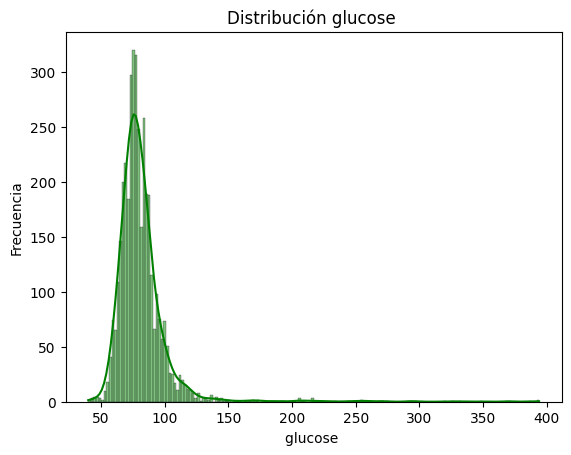

In [54]:
datos_glucose =datos.glucose
sns.histplot(datos_glucose ,kde=True,color='green')
plt.xlabel('glucose ')
plt.ylabel('Frecuencia')
plt.title('Distribución glucose ')
plt.show()

###Se observa que en algunas columnas hay un comportamiento de distribución normal, en otras no, para evitar introducir sesgos y dado que el total de datos faltantes es relativemente pequeño (menor al 10%),se decide eliminar todos los registros faltantes.

In [55]:
datos1=datos.dropna()
datos1.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
datos1.shape

(3749, 15)

###Visualización de las clases en la columna 'TenYearCHD'

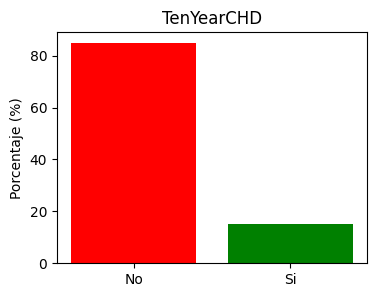

In [56]:
total_casos = len(datos1)
porcentaje_no = (datos1['TenYearCHD'] == 0).sum() / total_casos * 100
porcentaje_si = (datos1['TenYearCHD'] == 1).sum() / total_casos * 100

# Crear un gráfico de barras
categorias = ['No', 'Si']
porcentajes = [porcentaje_no, porcentaje_si]

plt.figure(figsize=(4, 3))
plt.bar(categorias, porcentajes, color=['red', 'green'])
plt.title('TenYearCHD')
plt.ylabel('Porcentaje (%)')

# Mostrar el gráfico
plt.show()

In [57]:
print(f'Porcentaje casos Positivos : {porcentaje_si:.4f} %')
print(f'Porcentaje casos Negativos : {porcentaje_no:.4f} %')

Porcentaje casos Positivos : 15.2574 %
Porcentaje casos Negativos : 84.7426 %


###Separar las variables independientes de la variable objetivo

In [58]:
x=datos1.iloc[:,0:13]
x

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0


In [59]:
y=datos1.iloc[:,-1]
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3749, dtype: int64

In [60]:
x1=x.values
x1

array([[ 1.  , 39.  ,  0.  , ..., 70.  , 26.97, 80.  ],
       [ 0.  , 46.  ,  0.  , ..., 81.  , 28.73, 95.  ],
       [ 1.  , 48.  ,  1.  , ..., 80.  , 25.34, 75.  ],
       ...,
       [ 1.  , 50.  ,  1.  , ..., 92.  , 25.97, 66.  ],
       [ 1.  , 51.  ,  1.  , ..., 80.  , 19.71, 65.  ],
       [ 0.  , 52.  ,  0.  , ..., 83.  , 21.47, 80.  ]])

In [ ]:
y1=y.values
y1

array([0, 0, 0, ..., 1, 0, 0])

In [61]:
# Escalado de datos
from sklearn.preprocessing import MinMaxScaler
escalador=MinMaxScaler()
x1_escalada=escalador.fit_transform(x1)

In [62]:
x1_escalada

array([[1.        , 0.18421053, 0.        , ..., 0.23280423, 0.27702375,
        0.36363636],
       [0.        , 0.36842105, 0.        , ..., 0.34920635, 0.31968008,
        0.51515152],
       [1.        , 0.42105263, 1.        , ..., 0.33862434, 0.23751818,
        0.31313131],
       ...,
       [1.        , 0.47368421, 1.        , ..., 0.46560847, 0.2527872 ,
        0.22222222],
       [1.        , 0.5       , 1.        , ..., 0.33862434, 0.10106641,
        0.21212121],
       [0.        , 0.52631579, 0.        , ..., 0.37037037, 0.14372273,
        0.36363636]])

###2 Modelamiento de los datos con busquedad de rejilla y validación cruzada estratificada

####2.1 Uso de algoritmos de máquina de soporte vectorial y regresión logistica

In [63]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [64]:
cv1=StratifiedKFold(n_splits=5,shuffle=True,random_state=21)

In [65]:
metricas=['f1_macro','accuracy']

In [66]:
modelo1=svm.SVC(gamma='auto')
parametros1={'C':[0.1,10,100],
             'kernel':['rbf','linear','poly']}

In [67]:
rejilla1=GridSearchCV(modelo1,parametros1,scoring=metricas,refit='f1_macro',cv=cv1,return_train_score=False)

In [69]:
rejilla1.fit(x1_escalada,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=21, shuffle=True),
             estimator=SVC(gamma='auto'),
             param_grid={'C': [0.1, 10, 100],
                         'kernel': ['rbf', 'linear', 'poly']},
             refit='f1_macro', scoring=['f1_macro', 'accuracy'])

In [70]:
mejor_score1= rejilla1.best_score_*100
mejores_parametros1=rejilla1.best_params_

In [ ]:
print(f' f1_macro de SVC  fue : {mejor_score1 :.2f} %')
print(f'Los mejores hiper parámetros de SVM fueron : {mejores_parametros1}')

 f1_macro de SVC  fue : 47.55 %
Los mejores hiper parámetros de SVM fueron : {'C': 100, 'kernel': 'rbf'}


In [71]:
#Tabla de iteraciones de SVM
resultados1 =pd.DataFrame(rejilla1.cv_results_)[['params','mean_test_f1_macro','mean_test_accuracy']]
resultados1

,params,mean_test_f1_macro,mean_test_accuracy
0,"{'C': 0.1, 'kernel': 'rbf'}",0.458706,0.847426
1,"{'C': 0.1, 'kernel': 'linear'}",0.458706,0.847426
2,"{'C': 0.1, 'kernel': 'poly'}",0.458706,0.847426
3,"{'C': 10, 'kernel': 'rbf'}",0.458706,0.847426
4,"{'C': 10, 'kernel': 'linear'}",0.458706,0.847426
5,"{'C': 10, 'kernel': 'poly'}",0.458706,0.847426
6,"{'C': 100, 'kernel': 'rbf'}",0.475488,0.847694
7,"{'C': 100, 'kernel': 'linear'}",0.458706,0.847426
8,"{'C': 100, 'kernel': 'poly'}",0.468800,0.847160


In [72]:
exactitud1=resultados1.iloc[6,2]*100
print(f'La exactitud del modelo de SVM  fue : {exactitud1: .2f} %')

La exactitud del modelo de SVM  fue :  84.77 %


In [73]:
modelo2=LogisticRegression(solver='liblinear',multi_class='auto')

In [74]:
parametros2={'C':[0.1,10,100],
             'penalty':['l1','l2']}

In [75]:
rejilla2=GridSearchCV(modelo2,parametros2,scoring=metricas,refit='f1_macro',cv=cv1,return_train_score=False)

In [76]:
rejilla2.fit(x1_escalada,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=21, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 10, 100], 'penalty': ['l1', 'l2']},
             refit='f1_macro', scoring=['f1_macro', 'accuracy'])

In [77]:
mejor_score2= rejilla2.best_score_*100
mejores_parametros2=rejilla2.best_params_

In [78]:
print(f' f1_macro de regresión logistica  fue : {mejor_score2 :.2f} %')
print(f'Los mejores hiper parámetros de regresión logistica fueron : {mejores_parametros2}')

 f1_macro de regresión logistica  fue : 50.93 %
Los mejores hiper parámetros de regresión logistica fueron : {'C': 10, 'penalty': 'l1'}


In [79]:
#Tabla de iteraciones de regresión logistica
resultados2 =pd.DataFrame(rejilla2.cv_results_)[['params','mean_test_f1_macro','mean_test_accuracy']]
resultados2

,params,mean_test_f1_macro,mean_test_accuracy
0,"{'C': 0.1, 'penalty': 'l1'}",0.458706,0.847426
1,"{'C': 0.1, 'penalty': 'l2'}",0.460497,0.847693
2,"{'C': 10, 'penalty': 'l1'}",0.509275,0.848760
3,"{'C': 10, 'penalty': 'l2'}",0.508053,0.849026
4,"{'C': 100, 'penalty': 'l1'}",0.509275,0.848760
5,"{'C': 100, 'penalty': 'l2'}",0.509275,0.848760


In [80]:
exactitud2=resultados2.iloc[5,2]*100
print(f'La exactitud del modelo de regresión logistica  fue : {exactitud1: .2f} %')

La exactitud del modelo de regresión logistica  fue :  84.77 %


###Tabla comparativa de modelos

In [81]:
modelos={
        'Algoritmo':['SVM','Regresión_logistica'],
        'f1_macro':[mejor_score1,mejor_score2],
        'Exactitud':[exactitud1,exactitud2]
}

In [82]:
tabla_modelos=pd.DataFrame(modelos)
tabla_modelos

,Algoritmo,f1_macro,Exactitud
0,SVM,47.548846,84.769417
1,Regresión_logistica,50.927461,84.875977


##Para elegir el mejor modelo se tiene en cuenta tanto la exactitud, como el f1 macro, la exactitud es casi igual para ambos algoritmos, el f1 macro es mayor en la regresión logística y como esta métrica toma en cuenta tanto falsos positivos como falsos negativos, que es muy importante para predecir enfermedades, se determina que el mejor algoritmo que modela los datos es el de regresión logística.